<h1>Project Execution Order:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Open-the-files-and-examine-them." data-toc-modified-id="Open-the-files-and-examine-them.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Open the files and examine them.</a></span></li><li><span><a href="#Verify-that-the-recovery-efficiency-is-calculated-correctly." data-toc-modified-id="Verify-that-the-recovery-efficiency-is-calculated-correctly.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Verify that the recovery efficiency is calculated correctly.</a></span></li><li><span><a href="#Analyze-the-features-that-are-unavailable-in-the-test-dataset.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Analyze the features that are unavailable in the test dataset.</a></span></li><li><span><a href="#Perform-data-preprocessing." data-toc-modified-id="Perform-data-preprocessing.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Perform data preprocessing.</a></span></li></ul></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Investigate-the-changes-in-the-concentration-of-metals-(Au,-Ag,-Pb)-at-different-stages." data-toc-modified-id="Investigate-the-changes-in-the-concentration-of-metals-(Au,-Ag,-Pb)-at-different-stages.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Investigate the changes in the concentration of metals (Au, Ag, Pb) at different stages.</a></span></li><li><span><a href="#Analyze-the-distribution-of-the-particle-sizes-of-the-original-raw-material-in-the-training-and-test-datasets." data-toc-modified-id="Analyze-the-distribution-of-the-particle-sizes-of-the-original-raw-material-in-the-training-and-test-datasets.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Analyze the distribution of the particle sizes of the original raw material in the training and test datasets.</a></span></li><li><span><a href="#Explore-the-total-concentration-of-metals-at-various-stages." data-toc-modified-id="Explore-the-total-concentration-of-metals-at-various-stages.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Explore the total concentration of metals at various stages.</a></span></li></ul></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Building</a></span><ul class="toc-item"><li><span><a href="#Develop-a-function-to-calculate-the-final-sMAPE." data-toc-modified-id="Develop-a-function-to-calculate-the-final-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Develop a function to calculate the final sMAPE.</a></span></li><li><span><a href="#Train-different-models-and-evaluate-their-quality-using-cross-validation.-Determine-the-best-model." data-toc-modified-id="Train-different-models-and-evaluate-their-quality-using-cross-validation.-Determine-the-best-model.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Train different models and evaluate their quality using cross-validation. Determine the best model.</a></span></li></ul></div>

# Extraction of gold from ore

In this project, a prototype of a machine learning model for Tsifra was developed. The company develops solutions for the efficient operation of industrial enterprises.

The model predicts the recovery factor for gold from gold ore. Data with extraction and purification parameters are used.

The model will help optimize production so as not to launch an enterprise with unprofitable characteristics.

# Technological process

**Stages**
1. *Flotation*
<br>A mixture of gold-bearing ore is fed into the flotation plant. After enrichment, a rough concentrate and “dump tails” are obtained, that is, product residues with a low concentration of valuable metals.
The stability of this process is affected by the unstable and non-optimal physical and chemical state of the flotation pulp (a mixture of solid particles and liquid).

2. *Purification*
<br>The crude concentrate goes through two purifications. The output is the final concentrate and new final tailings.

**Data Description**
    
*Technological process*

* *Rougher feed* - feedstock
* *Rougher additions (or reagent additions)* - flotation reagents: Xanthate, Sulphate, Depressant
    - Xanthate - xanthate (promoter, or flotation activator);
    - Sulphate - sulfate (in this production, sodium sulfide);
    - Depressant - depressant (sodium silicate).
* * Rougher process * (English "rough process") - flotation
* * Rougher tails * - dump tails
* *Float banks* - flotation unit
* * Cleaner process * - cleaning
* *Rougher Au* — rough gold concentrate
* *Final Au* — final gold concentrate

    **Stage parameters**
* *air amount* — air volume
* *fluid levels* — fluid level
* *feed size* — feed granule size
* feed rate* — feed rate

**Feature name**

[stage].[parameter_type].[parameter_name]
Example: rougher.input.feed_ag

Possible values for block [stage]:
- *rougher* - flotation
- *primary_cleaner* - primary cleaning
- *secondary_cleaner* - secondary cleaning
- *final* - final characteristics

Possible values for block [parameter_type]:
- *input* — raw material parameters
- *output* — product parameters
- *state* — parameters characterizing the current state of the stage
- *calculation* — calculated characteristics

Enrichment efficiency is calculated using the following formula:

$$Recovery = \frac{C × (F - T)}{F × (C - T)}$$

Where:

$C$ is the proportion of gold in the concentrate after flotation/refining;

$F$ is the share of gold in the raw material/concentrate before flotation/refining;

$T$ is the share of gold in final tailings after flotation/cleaning.

As a quality metric, sMAPE (Symmetric Mean Absolute Percentage Error) is used, which is calculated by the formula:

$$sMAPE = \frac{1}{N} × \sum_{i=1}^{N}\frac{|y_{i} - \stackrel{\land}{y_{i}}|}{(| y_{i}|+ |\stackrel{\land}{y_{i}}|)/2}$$

Where:
$y_{i}$ - the value of the target feature for the object with serial number i in the sample on which the quality is measured;

$\stackrel{\land}{y_{i}}$ - prediction value for the object with index i, for example, in the test sample;

N - the number of objects in the sample

You need to predict two quantities at once:
- rough concentrate enrichment efficiency rougher.output.recovery;
- efficiency of final concentrate final.output.recovery enrichment.

**The final metric consists of two values:**


$$final-sMAPE = 0.25 × sMAPE(rougher) + 0.75 × sMAPE(final)$$


## Data Preparation

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None) # все столбцын
pd.set_option('display.max_rows', None) # все столбцын
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)  # 2 знака после запятой
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy.random import RandomState
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score,roc_auc_score,f1_score,precision_score, recall_score, roc_auc_score, roc_curve, mean_squared_error
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
from sklearn.inspection import permutation_importance

### Open the files and examine them.

In [2]:
df_train = pd.read_csv(r'datasets/08_gold_recovery_train_new.csv', sep=',', parse_dates = ['date'])
df_test = pd.read_csv(r'datasets/08_gold_recovery_test_new.csv', sep=',', parse_dates = ['date'])
df_full = pd.read_csv(r'datasets/08_gold_recovery_full_new.csv', sep=',', parse_dates = ['date'])
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,127.09,10.13,7.25,0.99,8.55,10.39,19.53,34.17,14.94,2.53,7.48,2.11,1549.78,-498.91,1551.43,-516.40,1549.87,-498.67,1554.37,-493.43,41885.71,3481.78,3520.34,2.84,6.10,2.28,523.55,55.49,36.81,6.49,11.99,6.01,11.84,6.01,11.50,7.10,28.03,19.79,87.11,5.01,0.51,19.15,1.17,999.71,-404.07,1603.01,-434.72,1602.38,-442.20,1598.94,-451.29,1404.47,-455.46,1416.35,-451.94,14.50,4.69,8.76,2.61,25.85,-498.53,23.89,-501.41,23.96,-495.26,21.94,-499.34,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,125.63,10.30,7.25,1.00,8.56,10.50,19.37,34.12,16.25,3.05,6.73,2.35,1576.17,-500.90,1575.95,-499.87,1575.99,-499.32,1574.48,-498.93,42050.86,3498.37,3489.98,2.86,6.16,2.27,525.29,57.28,35.75,6.48,11.97,6.01,12.00,6.01,11.62,7.28,28.07,20.05,86.84,4.96,0.54,18.97,1.18,1000.29,-400.07,1600.75,-449.95,1600.48,-449.83,1600.53,-449.95,1399.23,-450.87,1399.72,-450.12,14.27,4.59,9.00,2.49,25.88,-499.99,23.89,-500.37,23.97,-500.

In [3]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.80,14.99,8.08,1.01,1398.98,-500.23,1399.14,-499.92,1400.10,-500.70,1399.00,-499.49,13.13,5.64,489.79,62.71,42.02,12.08,16.92,6.15,16.87,6.15,1001.85,-350.30,1249.74,-399.11,1249.75,-399.40,1198.29,-399.49,999.47,-399.53,949.57,-398.18,24.94,-500.49,14.95,-500.01,20.02,-450.40,13.99,-449.83,12.02,-497.80,8.02,-501.29,7.95,-432.32,4.87,-500.04,26.71,-499.71
1,2016-09-01 01:59:59,215.39,14.99,8.08,0.99,1398.78,-500.06,1398.06,-499.78,1396.15,-499.24,1399.51,-500.42,13.04,5.53,490.10,61.96,41.19,11.92,17.00,6.00,17.00,6.00,998.69,-350.43,1248.40,-399.95,1249.51,-399.63,1200.51,-399.94,1000.00,-399.49,950.20,-405.79,24.92,-499.81,14.93,-500.76,19.99,-450.11,14.09,-450.06,12.06,-498.70,8.13,-499.63,7.96,-525.84,4.88,-500.16,25.02,-499.82
2,2016-09-01 02:59:59,215.26,12.88,7.79,1.00,1398.49,-500.87,1398.86,-499.76,1398.08,-502.15,1399.50,-499.72,13.14,5.43,489.62,66.90,42.55,12.09,16.99,5.85,16.98,5.85,998.52,-349.78,1247.44,-400.26,1248.21,-401.07,1199.77,-400.79,999.93,-399.24,950.32,-400.86,24.91,-500.30,15.00,-500.99,20.04,-450.26,14.08,-449.66,11.96,-498.77,8.10,-500.83,8.07,-500.80,4.91,-499.83,24.99,-500.62
3,2016-09-01 03:59:59,215.34,12.01,7.64,0.86,1399.62,-498.86,1397.44,-499.21,1400.13,-498.36,1401.07,-501.04,12.40,5.11,476.62,59.87,41.06,12.18,16.53,5.80,16.52,5.80,1000.28,-350.17,1251.32,-398.66,1250.49,-399.75,1199.40,-397.50,1001.93,-400.44,950.74,-399.80,24.89,-499.38,14.92,-499.86,20.03,-449.37,14.01,-449.53,12.03,-498.35,8.07,-499.47,7.90,-500.87,4.93,-499.96,24.95,-498.71
4,2016-09-01 04:59:59,199.10,10.68,7.53,0.81,1401.27,-500.81,1398.13,-499.50,1402.17,-500.81,1399.48,-499.37,11.33,4.77,488.25,63.32,41.27,11.29,13.61,5.74,13.65,5.74,996.54,-350.56,1304.66,-399.51,1306.46,-399.05,1248.70,-400.88,1058.84,-398.99,949.65,-399.28,24.89,-499.36,14.98,-500.19,19.96,-450.64,14.01,-450.02,12.03,-500.79,8.05,-500.40,8.11,-509.53,4.96,-500.36,25.00,-500.86


In [4]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,127.09,10.13,7.25,0.99,8.55,10.39,19.53,34.17,14.94,2.53,7.48,2.11,1549.78,-498.91,1551.43,-516.40,1549.87,-498.67,1554.37,-493.43,41885.71,3481.78,3520.34,2.84,6.10,2.28,523.55,55.49,36.81,6.49,11.99,6.01,11.84,6.01,11.50,7.10,28.03,19.79,87.11,5.01,0.51,19.15,1.17,999.71,-404.07,1603.01,-434.72,1602.38,-442.20,1598.94,-451.29,1404.47,-455.46,1416.35,-451.94,14.50,4.69,8.76,2.61,25.85,-498.53,23.89,-501.41,23.96,-495.26,21.94,-499.34,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,125.63,10.30,7.25,1.00,8.56,10.50,19.37,34.12,16.25,3.05,6.73,2.35,1576.17,-500.90,1575.95,-499.87,1575.99,-499.32,1574.48,-498.93,42050.86,3498.37,3489.98,2.86,6.16,2.27,525.29,57.28,35.75,6.48,11.97,6.01,12.00,6.01,11.62,7.28,28.07,20.05,86.84,4.96,0.54,18.97,1.18,1000.29,-400.07,1600.75,-449.95,1600.48,-449.83,1600.53,-449.95,1399.23,-450.87,1399.72,-450.12,14.27,4.59,9.00,2.49,25.88,-499.99,23.89,-500.37,23.97,-500.

In [5]:
print(len(df_train.columns))
print(len(df_test.columns))
print(len(df_full.columns))

87
53
87


There are fewer columns in the test dataset, apparently this is due to the fact that some of the values ​​​​are calculated later, below we will check this assumption

In [6]:
# Description function
def describe_colums(df_train):
    
    values = pd.DataFrame()
    
    for col in df_train.columns:
        values[col] = [df_train[col].unique(), df_train[col].dtypes, df_train[col].nunique(), df_train[col].isnull().sum().sum(), df_train.duplicated().sum()]
        
    return values.transpose().sort_values(by=1, ascending=False).rename(
        {0: 'Values', 1: 'Data type', 2: 'Unique values', 3: 'Missing', 4: 'Duplicates'}, axis=1)
describe_colums(df_train)

,Values,Data type,Unique values,Missing,Duplicates
date,"[2016-01-15T00:00:00.000000000, 2016-01-15T01:...",datetime64[ns],14149,0,0
rougher.state.floatbank10_b_air,"[1603.0113525390625, 1600.7545865877255, 1599....",float64,14148,1,0
rougher.state.floatbank10_f_air,"[1416.35498046875, 1399.719513943327, 1400.316...",float64,14149,0,0
rougher.state.floatbank10_e_level,"[-455.4629821777344, -450.8698476235493, -449....",float64,14149,0,0
rougher.state.floatbank10_e_air,"[1404.4720458984375, 1399.227083704032, 1399.1...",float64,13713,436,0
rougher.state.floatbank10_d_level,"[-451.2941284179688, -449.95364917032936, -449...",float64,14149,0,0
rougher.state.floatbank10_d_air,"[1598.937255859375, 1600.5275885762942, 1599.8...",float64,14149,0,0
rougher.state.floatbank10_c_level,"[-442.2044677734375, -449.83064631263886, -449...",float64,14148,1,0
rougher.state.floatbank10_c_air,"[1602.375, 1600.4795799122414, 1599.6727973002...",float64,14148,1,0
rougher.state.floatbank10_b_level,"[-434.7150268554688, -449.9534345138957, -450....",float64,14148,1,0


In [7]:
# Description function
def describe_colums(df_test):
    
    values = pd.DataFrame()
    
    for col in df_test.columns:
        values[col] = [df_test[col].unique(), df_test[col].dtypes, df_test[col].nunique(), df_test[col].isnull().sum().sum(), df_test.duplicated().sum()]
        
    return values.transpose().sort_values(by=1, ascending=False).rename(
        {0: 'Values', 1: 'Data type', 2: 'Unique values', 3: 'Missing', 4: 'Duplicates'}, axis=1)
describe_colums(df_test)

,Values,Data type,Unique values,Missing,Duplicates
date,"[2016-09-01T00:59:59.000000000, 2016-09-01T01:...",datetime64[ns],5290,0,0
rougher.state.floatbank10_c_air,"[1249.7505195228885, 1249.5144511247904, 1248....",float64,5290,0,0
rougher.state.floatbank10_d_air,"[1198.287855098401, 1200.5064593644192, 1199.7...",float64,5290,0,0
rougher.state.floatbank10_d_level,"[-399.48859420055646, -399.9424338226521, -400...",float64,5290,0,0
rougher.state.floatbank10_e_air,"[999.4722502386644, 1000.0021142733016, 999.92...",float64,5290,0,0
rougher.state.floatbank10_e_level,"[-399.5309622422577, -399.49152776724816, -399...",float64,5290,0,0
rougher.state.floatbank10_f_air,"[949.566189353824, 950.2000089609317, 950.3204...",float64,5290,0,0
rougher.state.floatbank10_f_level,"[-398.1808065032195, -405.7875142628815, -400....",float64,5290,0,0
secondary_cleaner.state.floatbank2_a_air,"[24.93820004836713, 24.923465878892607, 24.908...",float64,5287,3,0
secondary_cleaner.state.floatbank2_a_level,"[-500.4909632087492, -499.8139628568625, -500....",float64,5290,0,0


In [8]:
# Description function
def describe_colums(df_full):
    
    values = pd.DataFrame()
    
    for col in df_full.columns:
        values[col] = [df_full[col].unique(), df_full[col].dtypes, df_full[col].nunique(), df_full[col].isnull().sum().sum(), df_full.duplicated().sum()]
        
    return values.transpose().sort_values(by=1, ascending=False).rename(
        {0: 'Values', 1: 'Data type', 2: 'Unique values', 3: 'Missing', 4: 'Duplicates'}, axis=1)
describe_colums(df_full)

,Values,Data type,Unique values,Missing,Duplicates
date,"[2016-01-15T00:00:00.000000000, 2016-01-15T01:...",datetime64[ns],19439,0,0
rougher.state.floatbank10_b_air,"[1603.0113525390625, 1600.7545865877255, 1599....",float64,19438,1,0
rougher.state.floatbank10_f_air,"[1416.35498046875, 1399.719513943327, 1400.316...",float64,19439,0,0
rougher.state.floatbank10_e_level,"[-455.4629821777344, -450.8698476235493, -449....",float64,19439,0,0
rougher.state.floatbank10_e_air,"[1404.4720458984375, 1399.227083704032, 1399.1...",float64,19003,436,0
rougher.state.floatbank10_d_level,"[-451.2941284179688, -449.95364917032936, -449...",float64,19439,0,0
rougher.state.floatbank10_d_air,"[1598.937255859375, 1600.5275885762942, 1599.8...",float64,19439,0,0
rougher.state.floatbank10_c_level,"[-442.2044677734375, -449.83064631263886, -449...",float64,19438,1,0
rougher.state.floatbank10_c_air,"[1602.375, 1600.4795799122414, 1599.6727973002...",float64,19438,1,0
rougher.state.floatbank10_b_level,"[-434.7150268554688, -449.9534345138957, -450....",float64,19438,1,0


Data gaps are allowed in columns, while the data column does not contain them. Most of the gaps are in the training data, but only one column, secondary_cleaner.output.tail_sol, has more than 10% gaps. In other cases, they are insignificant. There are no duplicates. The data is presented in the correct format.

In [9]:
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.00,14148.00,13938.00,14149.00,14149.00,14149.00,14049.00,14144.00,14149.00,14129.00,14117.00,14149.00,14049.00,14149.00,14063.00,13863.00,14149.00,14148.00,14134.00,14103.00,14149.00,14145.00,14148.00,14145.00,14148.00,14147.00,14148.00,14146.00,14148.00,14148.00,14148.00,14148.00,14149.00,14149.00,14049.00,14141.00,14005.00,14071.00,14149.00,14120.00,14141.00,14113.00,13721.00,14149.00,14149.00,14127.00,14149.00,14149.00,14148.00,14149.00,14149.00,14149.00,14148.00,14148.00,14148.00,14148.00,14148.00,14148.00,14149.00,14149.00,13713.00,14149.00,14149.00,14149.00,14147.00,14139.00,12544.00,14149.00,13932.00,14148.00,14128.00,14148.00,14145.00,14148.00,14148.00,14148.00,14143.00,14148.00,14148.00,14148.00,14148.00,14148.00,14148.00,14148.00,14147.00,14148.00
mean,5.14,10.13,9.20,44.00,66.52,9.61,2.60,10.51,2.92,133.32,8.87,7.32,0.89,8.20,9.59,10.11,32.39,16.30,3.44,7.53,3.84,1608.00,-488.78,1608.61,-489.17,1608.88,-489.61,1542.19,-483.46,40382.65,3456.61,3253.36,2.37,8.58,3.52,474.03,60.11,36.31,7.87,11.76,5.85,11.37,5.89,11.78,7.66,28.30,19.44,82.70

In [10]:
df_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.00,5285.00,5290.00,5286.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5287.00,5289.00,5269.00,5290.00,5285.00,5290.00,5282.00,5265.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5287.00,5290.00,5288.00,5290.00,5281.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00
mean,174.84,8.68,7.27,1.38,1539.49,-497.67,1545.17,-500.27,1527.27,-498.33,1544.84,-500.20,9.37,3.80,489.80,55.95,37.72,9.33,13.86,6.47,13.92,6.51,1053.40,-395.73,1318.93,-475.24,1301.60,-474.84,1214.85,-475.68,1056.65,-469.03,997.95,-470.48,26.31,-502.75,21.95,-501.99,25.40,-507.49,20.98,-506.63,16.32,-505.14,13.74,-463.35,12.80,-501.33,9.88,-495.66,17.30,-501.79
std,43.03,3.07,0.61,0.64,116.80,19.95,122.22,32.97,122.54,21.96,124.77,31.05,1.93,0.95,108.04,19.08,5.49,1.62,3.35,1.07,3.22,0.89,121.14,91.09,156.45,45.65,171.27,45.86,185.76,47.84,131.54,59.33,128.22,60.76,3.43,28.76,4.35,34.58,6.53,47.62,6.74,44.53,3.49,31.43,3.43,86.19,3.03,17.95,2.87,34.54,4.54,39.04
min,2.57,0.00,5.65,0.00,0.00,-795.32,0.00,-800.00,0.00,-799.96,0.00,-799.79,0.57,0.27,0.00,0.05,1.39,0.57,0.00,0.00,0.00,0.01,-0.04,-657.95,-0.72,-650.25,-0.06,-647.54,-0.99,-648.39,-1.98,-649.27,-2.59,-649.95,0.21,-784.09,0.01,-797.78,0.00,-799.76,0.00,-809.33,0.00,-799.80,0.00,-800.84,0.07,-797.32,0.53,-800.22,-0.08,-809.74
25%,147.12,6.49,6.89,0.91,1498.94,-500.36,1498.97,-500.70,1473.23,-501.02,1499.48,-500.45,8.11,3.24,407.02,43.91,34.51,8.21,12.00,6.00,12.00,6.00,999.21,-499.92,1200.87,-500.26,1199.65,-500.23,1093.37,-500.44,999.36,-500.19,901.02,-500.62,24.94,-500.21,20.00,-500.22,22.98,-500.30,17.97,-500.15,14.04,-500.87,12.03,-500.32,10.91,-500.73,8.04,-500.19,14.00,-500.69
50%,177.83,8.05,7.25,1.20,1585.13,-499.97,1595.62,-500.03,1549.59,-500.02,1594.58,-500.02,9.76,3.74,499.05,50.84,37.98,9.59,14.00,6.50,14.00,6.50,1000.47,-399.69,1302.25,-499.84,1300.20,-499.78,1207.01,-499.69,1047.50,-499.77,999.44,-499.68,26.91,-500.00,22.94,-500.02,25.01,-500.03,21.00,-500.01,17.01,-500.12,14.96,-499.58,12.95,-499.99

In [11]:
df_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.00,19438.00,19228.00,19439.00,19439.00,19438.00,19338.00,19433.00,19439.00,19415.00,19402.00,19439.00,19335.00,19439.00,19323.00,19069.00,19439.00,19435.00,19418.00,19377.00,19439.00,19435.00,19438.00,19435.00,19438.00,19437.00,19438.00,19436.00,19438.00,19437.00,19437.00,19437.00,19439.00,19439.00,19339.00,19428.00,19294.00,19340.00,19439.00,19405.00,19431.00,19395.00,18986.00,19439.00,19439.00,19416.00,19439.00,19439.00,19438.00,19439.00,19439.00,19439.00,19438.00,19438.00,19438.00,19438.00,19438.00,19438.00,19439.00,19439.00,19003.00,19439.00,19439.00,19439.00,19437.00,19427.00,17691.00,19439.00,19219.00,19438.00,19416.00,19438.00,19426.00,19438.00,19438.00,19438.00,19433.00,19438.00,19438.00,19438.00,19438.00,19438.00,19438.00,19438.00,19437.00,19438.00
mean,5.17,9.98,9.50,44.08,67.05,9.69,2.71,10.58,3.04,144.62,8.82,7.31,1.02,8.44,9.83,10.49,32.12,16.15,3.44,7.97,3.91,1589.35,-491.20,1591.34,-492.19,1586.67,-491.98,1542.91,-488.02,42171.19,3393.05,3256.85,2.42,8.79,3.60,478.32,58.97,36.70,8.27,12.33,6.02,12.06,6.07,11.99,7.61,28.81,19.77,83.33,

1. Among the minimum values of columns with target features, there are 0, which indicates the absence of any effect. These values should be removed.
2. In a number of signs there are negative values. Such as air level and pressure, which can be negative. Additional processing is not required here.
3. In the training and full dataset *rougher.calculation.sulfate_to_au_concentrate* has an extreme negative value. At the same time, there are no such signs in the test sample, which means that this will not affect the model.
4. Features are presented at different scales, scaling will be applied when creating the model.

### Verify that the recovery efficiency is calculated correctly.

In [12]:
#to calculate MAE we create a separate dataset with the necessary columns without duplicates
mae_columns = ['rougher.output.recovery', 'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']
mae_recovery = df_train[mae_columns]
mae_recovery.dropna(inplace=True)
C = mae_recovery['rougher.output.concentrate_au']
F = mae_recovery['rougher.input.feed_au']
T = mae_recovery['rougher.output.tail_au']
recovery = ((C*(F-T))/(F*(C-T))) * 100

In [13]:
print('MAE:', mean_absolute_error(df_train['rougher.output.recovery'], recovery))

MAE: 9.73512347450521e-15


MAE has a very low deviation - this confirms that the calculated value of rougher.output.recovery matches the data from the column.

### Analyze the features that are unavailable in the test dataset.

In [14]:
col_not_in_test = set(df_full.columns) - set(df_test.columns)
col_not_in_test

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [15]:
len(col_not_in_test)

34

There are 34 columns missing in the test set, there are no output values ​​on the test set. They are not needed to create the model, except for the -final.output.recovery and rougher.output.recovery target traits. The assumption on the values was confirmed. The training data is indeed missing some calculated values. Including target features final.output.recovery and rougher.output.recovery

### Perform data preprocessing.

As a result of the review of the data, it is necessary to carry out the following actions with the data:
- Exclude null values and NaN from target features
- Process (fill in) gaps in training features
- Add target features to the test set
- Remove data (not a feature)

In [16]:
#according to the condition of the problem, parameters adjacent in time are often similar, therefore it is possible to fill gaps with neighboring values.
size_df_train_before = df_train.shape
size_df_test_before = df_test.shape
size_df_full_before = df_full.shape
df_train = df_train.ffill(axis=0)
df_test = df_test.ffill(axis=0)
df_full = df_full.ffill(axis=0)
print('Training dataset size:', size_df_train_before, '; rows without gaps:', len(df_train.notna()))
print('Test dataset size:', size_df_test_before, '; rows without gaps:', len(df_test.notna()))
print('Full dataset size', size_df_full_before, '; rows without gaps:', len(df_full.notna()))

Training dataset size: (14149, 87) ; rows without gaps: 14149
Test dataset size: (5290, 53) ; rows without gaps: 5290
Full dataset size (19439, 87) ; rows without gaps: 19439


In [17]:
#добавляем целевые значения в тестовую выборку
df_test = df_test.merge(df_full.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

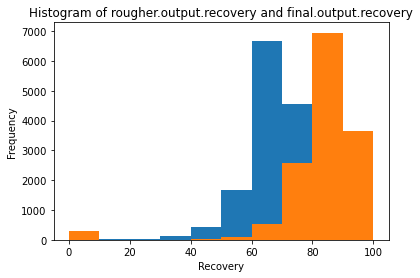

In [18]:
plt.hist(df_train['final.output.recovery'])
plt.hist(df_train['rougher.output.recovery'])
plt.title('Histogram of rougher.output.recovery and final.output.recovery')
plt.xlabel('Recovery')
plt.ylabel('Frequency')
plt.show()

final.output.recovery имеет нулевые значения, их следует удалить, так как это означает отсутствие эффективности

In [19]:
#remove null values rougher.output.recovery
df_train = df_train.drop(df_train[df_train['final.output.recovery'] == 0].index)

In [20]:
#remove null values rougher.output.recovery
df_train = df_train.drop('date', axis=1)
df_test = df_test.drop('date', axis=1)
df_full = df_full.drop('date', axis=1)

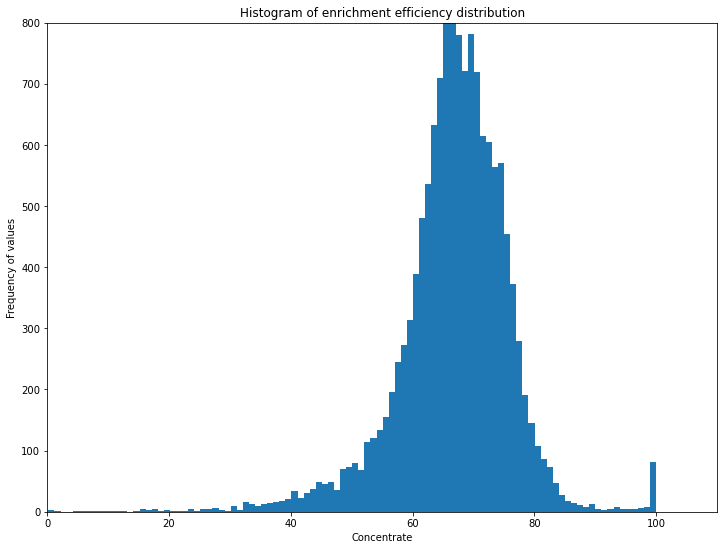

In [21]:
# Build a histogram of the efficiency of the final concentrate with the processed data
plt.figure(figsize=[12,9])

plt.hist(df_train['final.output.recovery'], bins=100)

plt.xlim([0, 110])
plt.ylim([0, 800])

plt.xlabel("Concentrate")
plt.ylabel("Frequency of values")

plt.title("Histogram of enrichment efficiency distribution")
plt.show()

In [22]:
# Description function
def describe_colums(df_train):
    
    values = pd.DataFrame()
    
    for col in df_train.columns:
        values[col] = [df_train[col].unique(), df_train[col].dtypes, df_train[col].nunique(), df_train[col].isnull().sum().sum(), df_train.duplicated().sum()]
        
    return values.transpose().sort_values(by=1, ascending=False).rename(
        {0: 'Values', 1: 'Data type', 2: 'Unique values', 3: 'Missing', 4: 'Duplicates'}, axis=1)
describe_colums(df_train)

,Values,Data type,Unique values,Missing,Duplicates
final.output.concentrate_ag,"[6.055402755737305, 6.0293685698980095, 6.0559...",float64,14063,0,0
rougher.state.floatbank10_b_air,"[1603.0113525390625, 1600.7545865877255, 1599....",float64,14090,0,0
rougher.state.floatbank10_f_air,"[1416.35498046875, 1399.719513943327, 1400.316...",float64,14091,0,0
rougher.state.floatbank10_e_level,"[-455.4629821777344, -450.8698476235493, -449....",float64,14091,0,0
rougher.state.floatbank10_e_air,"[1404.4720458984375, 1399.227083704032, 1399.1...",float64,13657,0,0
rougher.state.floatbank10_d_level,"[-451.2941284179688, -449.95364917032936, -449...",float64,14091,0,0
rougher.state.floatbank10_d_air,"[1598.937255859375, 1600.5275885762942, 1599.8...",float64,14091,0,0
rougher.state.floatbank10_c_level,"[-442.2044677734375, -449.83064631263886, -449...",float64,14090,0,0
rougher.state.floatbank10_c_air,"[1602.375, 1600.4795799122414, 1599.6727973002...",float64,14090,0,0
rougher.state.floatbank10_b_level,"[-434.7150268554688, -449.9534345138957, -450....",float64,14090,0,0


Training dataset ready for model training

## Data Analysis

### Investigate the changes in the concentration of metals (Au, Ag, Pb) at different stages.

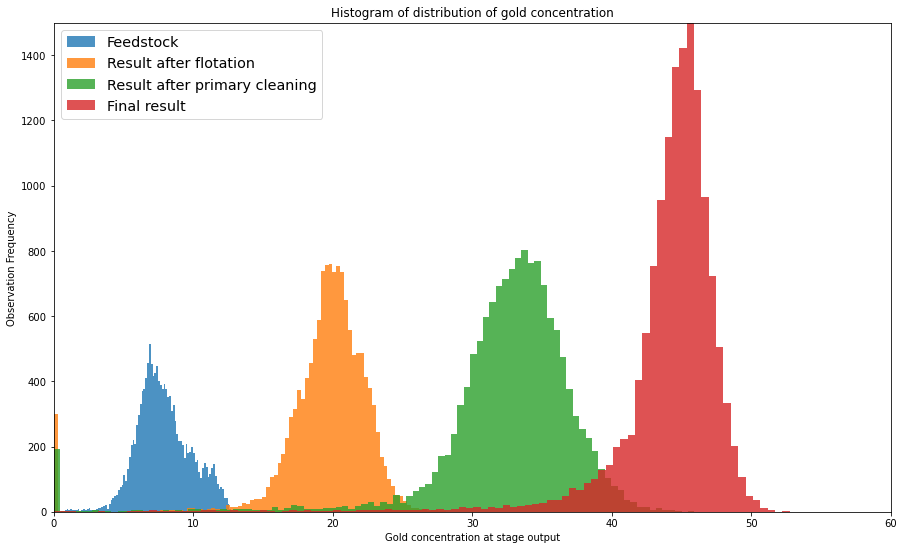

In [23]:
# gold
plt.figure(figsize=[15,9])

plt.hist(df_train['rougher.input.feed_au'], bins=100, label = 'Feedstock', alpha=.8)
plt.hist(df_train['rougher.output.concentrate_au'], bins=100, label = 'Result after flotation', alpha=.8)
plt.hist(df_train['primary_cleaner.output.concentrate_au'], bins=100, label = 'Result after primary cleaning', alpha=.8)
plt.hist(df_train['final.output.concentrate_au'], bins=100, label = 'Final result', alpha=.8)

plt.xlim([0, 60])
plt.ylim([0, 1500])

plt.xlabel("Gold concentration at stage output")
plt.ylabel("Observation Frequency")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Histogram of distribution of gold concentration")
plt.show()

As expected, the concentration of gold at each successive stage increases.

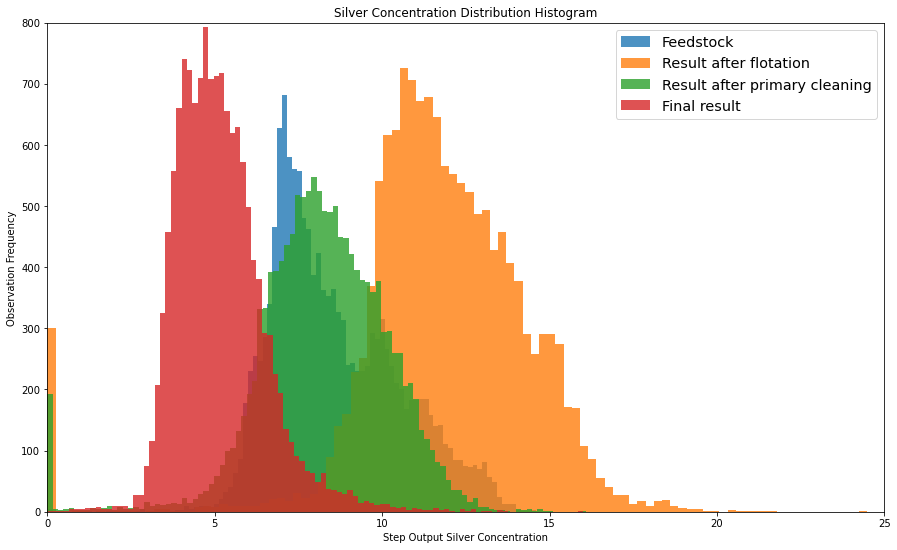

In [24]:
# Silver
plt.figure(figsize=[15,9])

plt.hist(df_train['rougher.input.feed_ag'], bins=100, label = 'Feedstock', alpha=.8)
plt.hist(df_train['rougher.output.concentrate_ag'], bins=100, label = 'Result after flotation', alpha=.8)
plt.hist(df_train['primary_cleaner.output.concentrate_ag'], bins=100, label = 'Result after primary cleaning', alpha=.8)
plt.hist(df_train['final.output.concentrate_ag'], bins=100, label = 'Final result', alpha=.8)

plt.xlim([0, 25])
plt.ylim([0, 800])

plt.xlabel("Step Output Silver Concentration")
plt.ylabel("Observation Frequency")

plt.legend(loc='upper right', fontsize='x-large')

plt.title("Silver Concentration Distribution Histogram")
plt.show()

The silver concentration rises slightly during the flotation step. Possibly, its content becomes higher due to the purification of the material from other elements. Then, at subsequent stages, it decreases. This is natural, since the material is purified from impurities, and hence from silver as well.

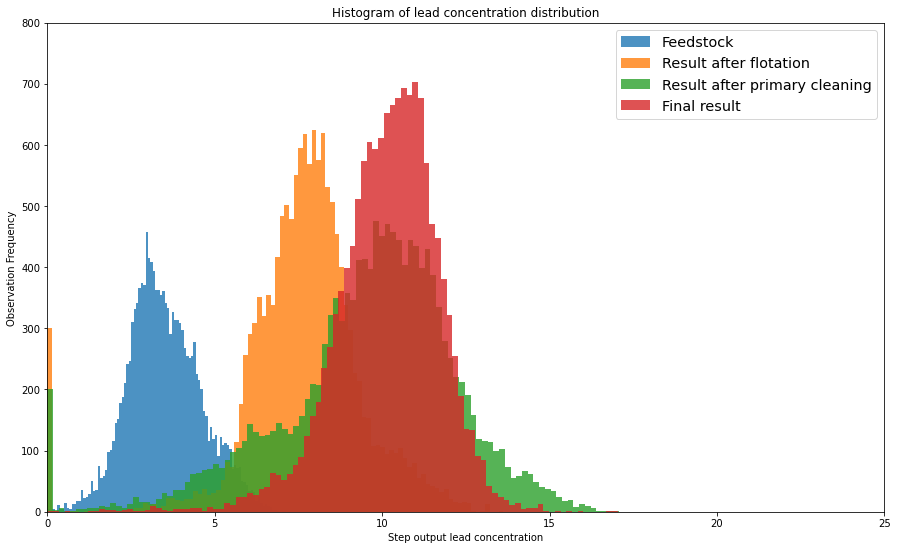

In [25]:
# Lead
plt.figure(figsize=[15,9])

plt.hist(df_train['rougher.input.feed_pb'], bins=100, label = 'Feedstock', alpha=.8)
plt.hist(df_train['rougher.output.concentrate_pb'], bins=100, label = 'Result after flotation', alpha=.8)
plt.hist(df_train['primary_cleaner.output.concentrate_pb'], bins=100, label = 'Result after primary cleaning', alpha=.8)
plt.hist(df_train['final.output.concentrate_pb'], bins=100, label = 'Final result', alpha=.8)

plt.xlim([0, 25])
plt.ylim([0, 800])

plt.xlabel("Step output lead concentration")
plt.ylabel("Observation Frequency")

plt.legend(loc='upper right', fontsize='x-large')

plt.title("Histogram of lead concentration distribution")
plt.show()

In [26]:
#remove identified outliers
df_train = df_train.drop(df_train[df_train['rougher.input.feed_pb'] < 1].index)
df_train = df_train.drop(df_train[df_train['rougher.output.concentrate_pb'] < 1].index)
df_train = df_train.drop(df_train[df_train['primary_cleaner.output.concentrate_pb'] < 1].index)

It is difficult to draw an unambiguous conclusion from the graph. However, in comparison with other graphs, it is clear that the lead content is low at the flotation stage as well. Perhaps its content becomes higher due to the purification of the material from other elements.

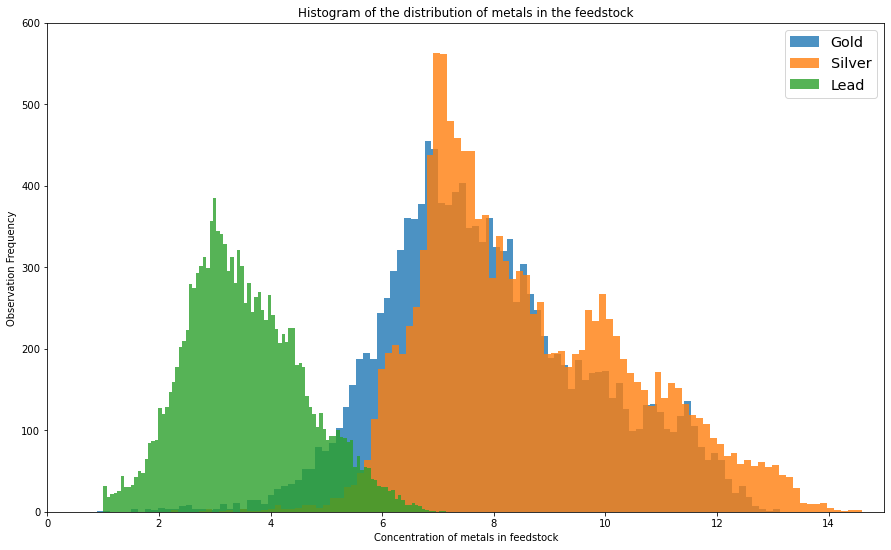

In [27]:
# Feedstock distribution
plt.figure(figsize=[15,9])

plt.hist(df_train['rougher.input.feed_au'], bins=100, label = 'Gold', alpha=.8)
plt.hist(df_train['rougher.input.feed_ag'], bins=100, label = 'Silver', alpha=.8)
plt.hist(df_train['rougher.input.feed_pb'], bins=100, label = 'Lead', alpha=.8)

plt.xlim([0, 15])
plt.ylim([0, 600])

plt.xlabel("Concentration of metals in feedstock")
plt.ylabel("Observation Frequency")

plt.legend(loc='upper right', fontsize='x-large')

plt.title("Histogram of the distribution of metals in the feedstock")
plt.show()

Surprisingly, the original material contains more silver than other metals, even the concentration of silver slightly exceeds the concentration of gold. Consider the redistribution of volumes of a particular metal in the following charts.

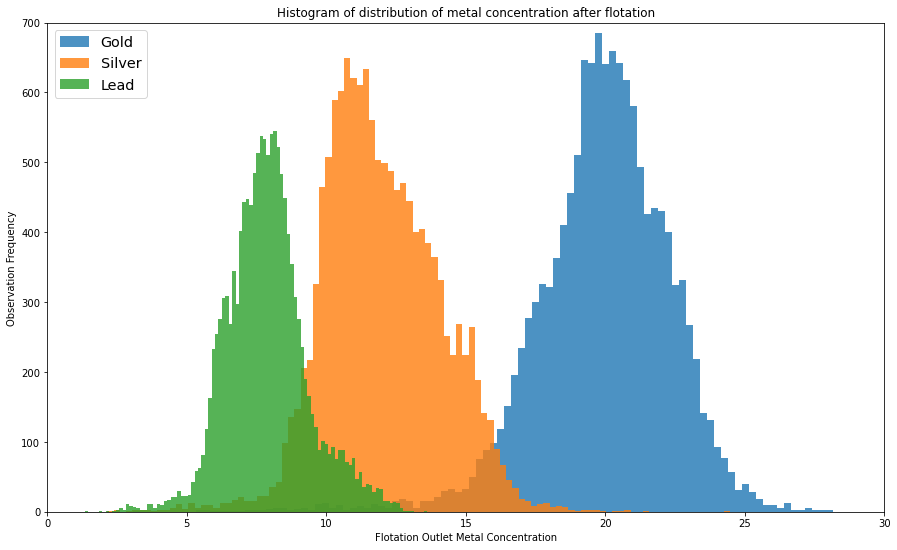

In [28]:
# Distribution in the flotation stage
plt.figure(figsize=[15,9])

plt.hist(df_train['rougher.output.concentrate_au'], bins=100, label = 'Gold', alpha=.8)
plt.hist(df_train['rougher.output.concentrate_ag'], bins=100, label = 'Silver', alpha=.8)
plt.hist(df_train['rougher.output.concentrate_pb'], bins=100, label = 'Lead', alpha=.8)

plt.xlim([0, 30])
plt.ylim([0, 700])

plt.xlabel("Flotation Outlet Metal Concentration")
plt.ylabel("Observation Frequency")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Histogram of distribution of metal concentration after flotation")
plt.show()

In [29]:
#remove identified outliers
df_train = df_train.drop(df_train[df_train['rougher.output.concentrate_ag'] < 1].index)
df_train = df_train.drop(df_train[df_train['rougher.output.concentrate_pb'] < 1].index)

It can be seen from the graph that already after flotation, gold predominates, slightly less silver, and lead is least of all present in the composition.

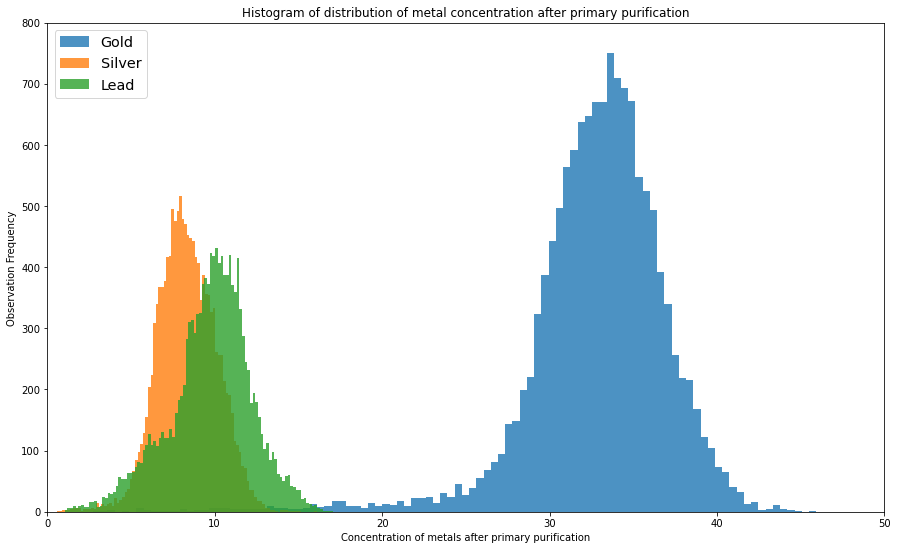

In [30]:
# Primary cleaning
plt.figure(figsize=[15,9])

plt.hist(df_train['primary_cleaner.output.concentrate_au'], bins=100, label = 'Gold', alpha=.8)
plt.hist(df_train['primary_cleaner.output.concentrate_ag'], bins=100, label = 'Silver', alpha=.8)
plt.hist(df_train['primary_cleaner.output.concentrate_pb'], bins=100, label = 'Lead', alpha=.8)

plt.xlim([0, 50])
plt.ylim([0, 800])

plt.xlabel("Concentration of metals after primary purification")
plt.ylabel("Observation Frequency")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Histogram of distribution of metal concentration after primary purification")
plt.show()

In [31]:
#remove identified outliers
df_train = df_train.drop(df_train[df_train['primary_cleaner.output.concentrate_au'] < 1].index)

Already after the primary purification, the gold concentrate is significantly separated from impurities.

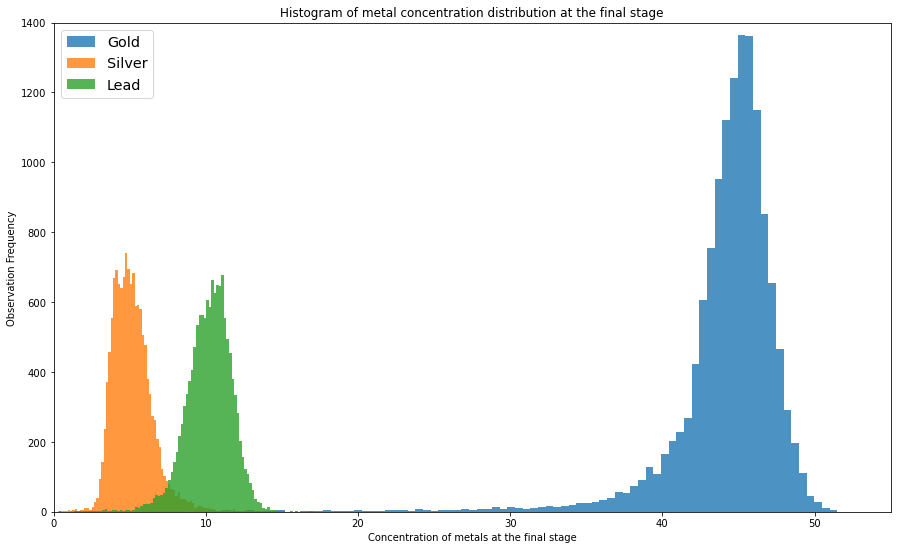

In [32]:
# Primary cleaning
plt.figure(figsize=[15,9])

plt.hist(df_train['final.output.concentrate_au'], bins=100, label = 'Gold', alpha=.8)
plt.hist(df_train['final.output.concentrate_ag'], bins=100, label = 'Silver', alpha=.8)
plt.hist(df_train['final.output.concentrate_pb'], bins=100, label = 'Lead', alpha=.8)

plt.xlim([0, 55])
plt.ylim([0, 1400])

plt.xlabel("Concentration of metals at the final stage")
plt.ylabel("Observation Frequency")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Histogram of metal concentration distribution at the final stage")
plt.show()

At the final stage, it is clearly seen how the most frequent results of the concentrate are in the values: gold -45-50, lead in the region of 10 and silver in the region of 5. That is, the concentration of gold reaches values ​​10 times higher than other metals.

### Analyze the distribution of the particle sizes of the original raw material in the training and test datasets.

Consider the size of the granules at the stage of flotation and primary cleaning.

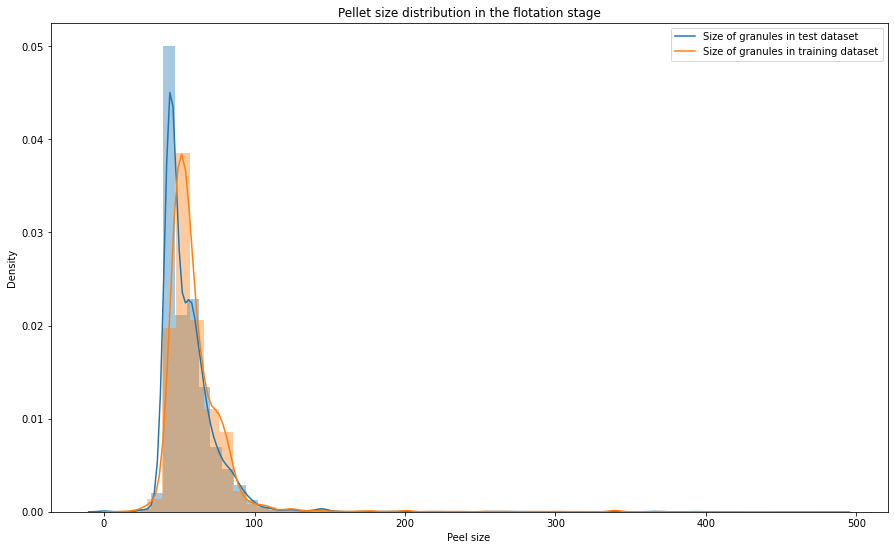

In [33]:
fig = plt.figure(figsize=(15,9))
sns.distplot(df_test['rougher.input.feed_size'])
sns.distplot(df_train['rougher.input.feed_size'])
plt.title('Pellet size distribution in the flotation stage')
plt.xlabel('Peel size')
plt.ylabel('Density')
plt.legend(labels=['Size of granules in test dataset','Size of granules in training dataset'])
plt.show()

According to the graph before flotation, close values ​​of granule sizes are observed.

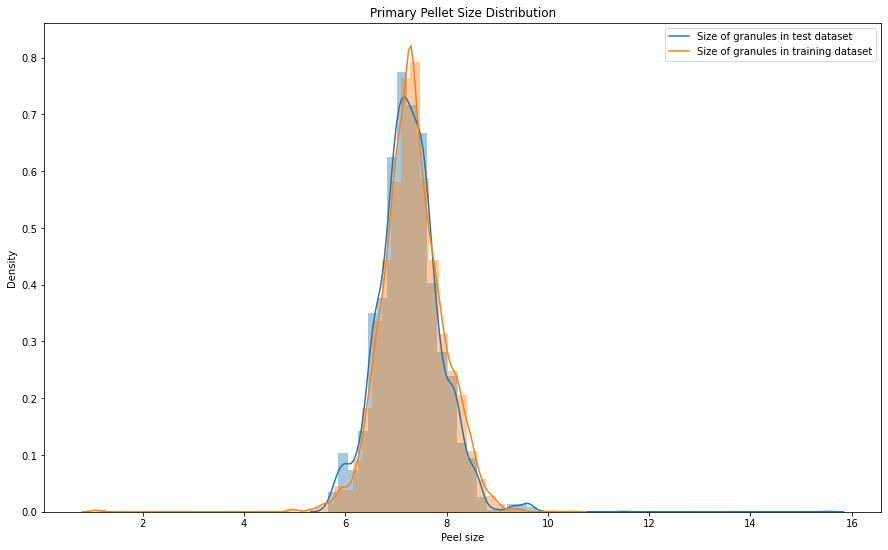

In [34]:
fig = plt.figure(figsize=(15,9))
sns.distplot(df_test['primary_cleaner.input.feed_size'])
sns.distplot(df_train['primary_cleaner.input.feed_size'])
plt.title('Primary Pellet Size Distribution')
plt.xlabel('Peel size')
plt.ylabel('Density')
plt.legend(labels=['Size of granules in test dataset','Size of granules in training dataset'])
plt.show()

At the stage of primary purification, the sizes of the granules are almost the same, the density is now also in close values. Therefore, the evaluation of the model will be adequate.

### Explore the total concentration of metals at various stages.

In [35]:
#for research, let's add all the impurities in the concentrates at different stages
sum_rougher_input_feed_train = (df_train['rougher.input.feed_au'] + df_train['rougher.input.feed_ag'] + 
                                  df_train['rougher.input.feed_pb'] + df_train['rougher.input.feed_sol'])

sum_rougher_output_conc_train = (df_train['rougher.output.concentrate_au'] + df_train['rougher.output.concentrate_ag'] + 
                                  df_train['rougher.output.concentrate_pb'] + df_train['rougher.output.concentrate_sol'])
sum_primary_cleaner_output_conc_train = (df_train['primary_cleaner.output.concentrate_au'] + 
                                         df_train['primary_cleaner.output.concentrate_ag'] + 
                                         df_train['primary_cleaner.output.concentrate_pb'] +
                                         df_train['primary_cleaner.output.concentrate_sol'])
sum_final_output_conc_train = (df_train['final.output.concentrate_au'] + df_train['final.output.concentrate_ag'] + 
                               df_train['final.output.concentrate_pb'] + df_train['final.output.concentrate_sol'])

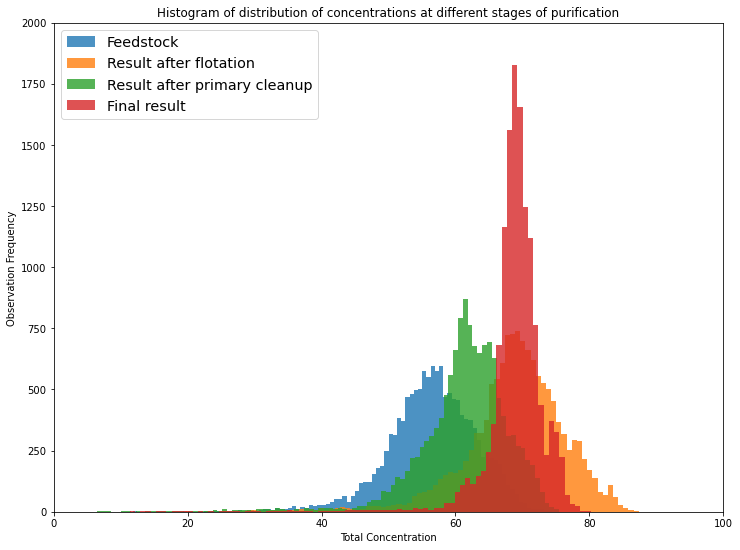

In [36]:
plt.figure(figsize=[12,9])

plt.hist(sum_rougher_input_feed_train, bins=100, label = 'Feedstock', alpha=.8)
plt.hist(sum_rougher_output_conc_train, bins=100, label = 'Result after flotation', alpha=.8)
plt.hist(sum_primary_cleaner_output_conc_train, bins=100, label = 'Result after primary cleanup', alpha=.8)
plt.hist(sum_final_output_conc_train, bins=100, label = 'Final result', alpha=.8)

plt.xlim([0, 100])
plt.ylim([0, 2000])

plt.xlabel("Total Concentration")
plt.ylabel("Observation Frequency")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Histogram of distribution of concentrations at different stages of purification")
plt.show()

When considering the total concentration, we can conclude that by the final stage, the concentration of substances increases sharply with a natural decrease in the range of scatter of values, based on the previous graphs, we can make an unambiguous conclusion that for the most part this is achieved by increasing the concentration of gold.
The data is ready, you can proceed to training the model.

## Model Building

### Develop a function to calculate the final sMAPE.

In [37]:
# unweight sMAPE 
def sMAPE (target, predictions):
    numerator = abs(predictions - target)
    denominator = (abs(target) + abs(predictions)) / 2
    summa = (numerator / denominator).sum()
    sMAPE = (1 / len(target)) * summa * 100
    return sMAPE

In [38]:
# final sMAPE
def sMAPE_end(model):
    sMAPE_rougher = cross_val (model, train_features_rougher, train_target_rougher)
    sMAPE_final = cross_val (model, train_features_final, train_target_final)
    sMAPE_end = 0.25 * sMAPE_rougher + 0.75 * sMAPE_final
    print('The quality assessment for cross-validation was', sMAPE_end)

### Train different models and evaluate their quality using cross-validation. Determine the best model.

In [39]:
# create a feature list for the flotation step
features_rougher = []
for column in df_test.columns:
    if "rougher" in column:
        features_rougher.append(column)

train_features_rougher = df_train[features_rougher]
train_target_rougher = df_train['rougher.output.recovery']
display(train_features_rougher.head())
display(train_target_rougher.head())

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.output.recovery
0,6.10,2.28,523.55,55.49,36.81,6.49,11.99,6.01,11.84,6.01,999.71,-404.07,1603.01,-434.72,1602.38,-442.20,1598.94,-451.29,1404.47,-455.46,1416.35,-451.94,87.11
1,6.16,2.27,525.29,57.28,35.75,6.48,11.97,6.01,12.00,6.01,1000.29,-400.07,1600.75,-449.95,1600.48,-449.83,1600.53,-449.95,1399.23,-450.87,1399.72,-450.12,86.84
2,6.12,2.16,530.03,57.51,35.97,6.36,11.92,6.20,11.92,6.20,999.72,-400.07,1599.34,-450.01,1599.67,-449.95,1599.85,-449.95,1399.18,-449.94,1400.32,-450.53,86.84
3,6.04,2.04,542.59,57.79,36.86,6.12,11.63,6.20,11.69,6.20,999.81,-400.20,1600.06,-450.62,1600.01,-449.91,1597.73,-450.13,1400.94,-450.03,1400.23,-449.79,87.23
4,6.06,1.79,540.53,56.05,34.35,5.66,10.96,6.20,10.96,6.19,999.68,-399.75,1600.21,-449.60,1600.36,-450.03,1599.76,-449.91,1401.56,-448.88,1401.16,-450.41,86.69


0   87.11
1   86.84
2   86.84
3   87.23
4   86.69
Name: rougher.output.recovery, dtype: float64

In [40]:
# create a list of features for the final stage
train_features_final = df_train[df_test.columns].drop(['rougher.output.recovery','final.output.recovery'], axis=1)
train_target_final = df_train['final.output.recovery']
display(train_features_final.head())
display(train_target_final.head())

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.09,10.13,7.25,0.99,1549.78,-498.91,1551.43,-516.40,1549.87,-498.67,1554.37,-493.43,6.10,2.28,523.55,55.49,36.81,6.49,11.99,6.01,11.84,6.01,999.71,-404.07,1603.01,-434.72,1602.38,-442.20,1598.94,-451.29,1404.47,-455.46,1416.35,-451.94,25.85,-498.53,23.89,-501.41,23.96,-495.26,21.94,-499.34,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,125.63,10.30,7.25,1.00,1576.17,-500.90,1575.95,-499.87,1575.99,-499.32,1574.48,-498.93,6.16,2.27,525.29,57.28,35.75,6.48,11.97,6.01,12.00,6.01,1000.29,-400.07,1600.75,-449.95,1600.48,-449.83,1600.53,-449.95,1399.23,-450.87,1399.72,-450.12,25.88,-499.99,23.89,-500.37,23.97,-500.09,22.09,-499.45,13.99,-505.50,11.95,-501.33,10.04,-500.17,7.98,-500.58,14.00,-599.79
2,123.82,11.32,7.25,0.99,1601.56,-500.00,1600.39,-500.61,1602.00,-500.87,1599.54,-499.83,6.12,2.16,530.03,57.51,35.97,6.36,11.92,6.20,11.92,6.20,999.72,-400.07,1599.34,-450.01,1599.67,-449.95,1599.85,-449.95,1399.18,-449.94,1400.32,-450.53,26.01,-499.93,23.89,-499.95,23.91,-499.44,23.96,-499.90,14.02,-502.52,11.91,-501.13,10.07,-500.13,8.01,-500.52,14.03,-601.43
3,122.27,11.32,7.25,1.00,1599.97,-500.95,1600.66,-499.68,1600.30,-500.73,1600.45,-500.05,6.04,2.04,542.59,57.79,36.86,6.12,11.63,6.20,11.69,6.20,999.81,-400.20,1600.06,-450.62,1600.01,-449.91,1597.73,-450.13,1400.94,-450.03,1400.23,-449.79,25.94,-499.18,23.96,-499.85,23.97,-500.01,23.95,-499.94,14.04,-500.86,12.00,-501.19,9.97,-499.20,7.98,-500.26,14.01,-600.00
4,117.99,11.91,7.25,1.01,1601.34,-498.98,1601.44,-500.32,1599.58,-500.89,1602.65,-500.59,6.06,1.79,540.53,56.05,34.35,5.66,10.96,6.20,10.96,6.19,999.68,-399.75,1600.21,-449.60,1600.36,-450.03,1599.76,-449.91,1401.56,-448.88,1401.16,-450.41,26.02,-500.28,23.96,-500.59,23.99,-500.08,23.96,-499.99,14.03,-499.84,11.95,-501.05,9.93,-501.69,7.89,-500.36,14.00,-601.50


0   70.54
1   69.27
2   68.12
3   68.35
4   66.93
Name: final.output.recovery, dtype: float64

In [41]:
#test samples
test_features_rougher = df_test[features_rougher]
test_target_rougher = df_test['rougher.output.recovery']
test_features_final = df_test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
test_target_final = df_test['final.output.recovery']

Ранее была выявлена потребность в маштабировании значений. Проведем ее на этапе флотации и финальном этапе

In [42]:
# at the flotation stage
scaler_rougher = StandardScaler()
scaler_rougher.fit(train_features_rougher)

train_col_rougher = train_features_rougher.columns
test_col_rougher = test_features_rougher.columns

train_features_rougher = scaler_rougher.transform(train_features_rougher)
train_features_rougher = pd.DataFrame(train_features_rougher, columns = train_col_rougher)

test_features_rougher = scaler_rougher.transform(test_features_rougher)
test_features_rougher = pd.DataFrame(test_features_rougher, columns = test_col_rougher)

# at the final stage

scaler_final = StandardScaler()
scaler_final.fit(train_features_final)

train_col_final = train_features_final.columns
test_col_final = test_features_final.columns

train_features_final = scaler_final.transform(train_features_final)
train_features_final = pd.DataFrame(train_features_final, columns = train_col_final)

test_features_final = scaler_final.transform(test_features_final)
test_features_final = pd.DataFrame(test_features_final, columns = test_col_final)

In [43]:
# function for cross-validation
def cross_val (model, features, target):
    scores = cross_val_score(model, features, 
                                   target, scoring=make_scorer(sMAPE, greater_is_better=True), cv=5,n_jobs=-1)
    sMAPE_res = np.mean(scores)
    return sMAPE_res

In [44]:
model = LinearRegression()
sMAPE_end(model)

The quality assessment for cross-validation was 8.193712582243425


In [45]:
model = DecisionTreeRegressor()
sMAPE_end(model)

The quality assessment for cross-validation was 11.57640327803677


In [46]:
model = RandomForestRegressor()
sMAPE_end(model)

The quality assessment for cross-validation was 6.995832171145432


In [47]:
model = DummyRegressor()
sMAPE_end(model)

The quality assessment for cross-validation was 9.572602741350293


According to the results of cross-validation, the best result is RandomForestRegressor.

In [52]:
best_sMAPE = 10
est_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 5):
        model = RandomForestRegressor(n_estimators=est, max_depth=depth)
        sMAPE_rougher = cross_val (model, train_features_rougher, train_target_rougher)
        sMAPE_final = cross_val (model, train_features_final, train_target_final)
        sMAPE_end = 0.25 * sMAPE_rougher + 0.75 * sMAPE_final
        if sMAPE_end < best_sMAPE:
            best_sMAPE = sMAPE_end
            best_est = est
            best_depth = depth
print('Best sMAPE value when considering RandomForestRegressor models:', best_sMAPE, 'with parameters:')
print('Number of trees - ', best_est)
print('Depth - ', best_depth)

Best sMAPE value when considering RandomForestRegressor models: 6.738875895529854 with parameters:
Number of trees -  20
Depth -  4


In [53]:
# present a similar function for testing on a test dataset
def sMAPE_end_test(model):
    model_rougher = model
    model_rougher.fit(train_features_rougher, train_target_rougher)
    predictions_rougher = model_rougher.predict(test_features_rougher)
    

    model_final = model
    model_rougher.fit(train_features_final, train_target_final)
    predictions_final = model_rougher.predict(test_features_final)
    
    sMAPE_rougher = sMAPE(test_target_rougher, predictions_rougher)
    sMAPE_final = sMAPE(test_target_final, predictions_final)
    sMAPE_end = 0.25 * sMAPE_rougher + 0.75 * sMAPE_final

    print('The final quality assessment for cross-validation was', sMAPE_end)

In [54]:
model = RandomForestRegressor(n_estimators=40, max_depth=4)
sMAPE_end_test(model)

The final quality assessment for cross-validation was 8.478537714337563


Compare the result with a random model

In [55]:
model = DummyRegressor()
sMAPE_end_test(model)

The final quality assessment for cross-validation was 9.811379508377899


Test passedBest sMAPE value when considering:
- RandomForestRegressor models: 6.7
with parameters:
- Number of trees - 20
- Depth - 4

This research examined the reported data.

The calculation of enrichment efficiency has been verified. The MAE value between the data and calculated efficiency values is calculated. The obtained MAE values ​​are close to 0. Therefore, the enrichment efficiency is calculated correctly.

Analysis of the concentration of metals showed that the concentration of gold increases significantly at each stage of processing of raw materials. Its content significantly exceeds impurities.

The size of the granules of the test and training data sets are almost identical, which made it possible to train the resulting model.

The best model is DecisionTreeRegressor, which is also confirmed by the test set.